![](https://i.imgur.com/HL4sH99.png)
## House Prices: Statistical and Data Analysis

###  Goal/Problem Statement: How can we make at least a 10% profit on our investments?


---

Context: We are flipping homes to turn a quick profit and are trying to figure out which upgrades/renovations lead to the greatest increase in Sales Price. <br>
<br>Criteria for Success: 10% increase in price from initial purchase price.<br>
<br>Scope of Solution Space: We are focusing on the difference in sale price from initial purchase price to new price after renovations and upgrades have been made to the home. We will focus on aspects that we have control over such as bathrooms, finished garages, among other similiar upgrades.<br>
<br>Constraints within Solution Space: We must be aware of not adding any square footage to the homes as well as the opportunity-cost to upgrade the home (the upgrade must increase new sale price by 10% more than the initial purchase price).<br>
<br>Stakeholders to Provide Key Insight: The stakeholders will be us as we are purchasing the homes and upgrading them in order to significantly increase price and our contractor as his expertise deals with the execution of the upgrades.<br>
<br>Key Data Sources: We will be getting our data from Kaggle. We are using The Ames Housing dataset which was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.<br>


***

# ISSUE TREE

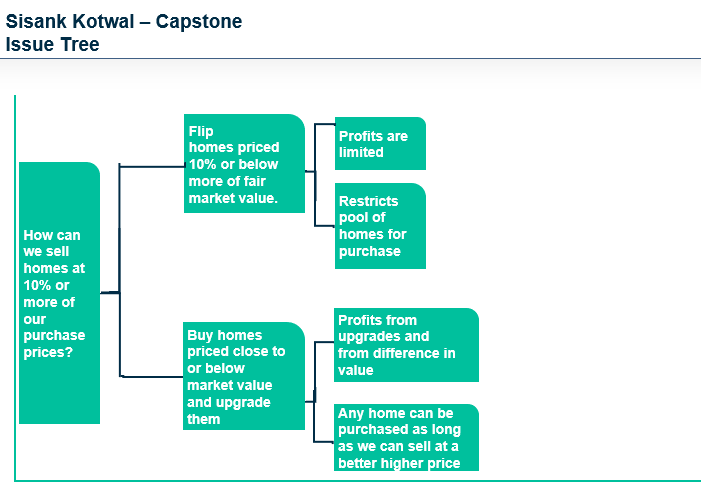

***

## <span style="color:blue">Importing Libraries</span> 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

## <span style="color:blue"> Load Data and Create Dataframe</span> 

In [2]:
train = pd.read_csv("../input/train2csv/train2.csv", header=0)

## <span style="color:blue">Data Cleansing </span>
    
### The goal is to remove redundant variables, keep only necessary variables for analysis, remove categorical variables, and remove rows where data is incomplete.


In [3]:
df_train = train.apply(pd.to_numeric, errors='coerce').reset_index(drop=True)
df_train.head(10)

,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Neighborhood
0,1,60,65.0,8450,NaN,7,5,2003,196.0,NaN,...,61,0,0,0,0,0,2,2008,208500,NaN
1,2,20,80.0,9600,NaN,6,8,1976,0.0,NaN,...,0,0,0,0,0,0,5,2007,181500,NaN
2,3,60,68.0,11250,NaN,7,5,2001,162.0,NaN,...,42,0,0,0,0,0,9,2008,223500,NaN
3,4,70,60.0,9550,NaN,7,5,1915,0.0,NaN,...,35,272,0,0,0,0,2,2006,140000,NaN
4,5,60,84.0,14260,NaN,8,5,2000,350.0,NaN,...,84,0,0,0,0,0,12,2008,250000,NaN
5,6,50,85.0,14115,NaN,5,5,1993,0.0,NaN,...,30,0,320,0,0,700,10,2009,143000,NaN
6,7,20,75.0,10084,NaN,8,5,2004,186.0,NaN,...,57,0,0,0,0,0,8,2007,307000,NaN
7,8,60,NaN,10382,NaN,7,6,1973,240.0,NaN,...,204,228,0,0,0,350,11,2009,200000,NaN
8,9,50,51.0,6120,NaN,7,5,1931,0.0,NaN,...,0,205,0,0,0,0,4,2008,129900,NaN
9,10,190,50.0,7420,NaN,5,6,1939,0.0,NaN,...,4,0,0,0,0,0,1,2008,118000,NaN


### In the following step, I will remove unnecessary variables and/or combine variables that can be added together, as well as look at the remaining variables' descriptive statistics.

In [4]:
#Combine WoodDeck SF, OpenPorchSF, and EnclosedPorch, 3SsnPorch, and ScreenPorch into one variable: PorchSF
df_train.loc[:,'PorchSF'] = df_train.loc[:,'OpenPorchSF'].add(df_train.loc[:,'EnclosedPorch']).add(df_train.loc[:,'WoodDeckSF']).add(df_train.loc[:,'3SsnPorch']).add(df_train.loc[:,'ScreenPorch'])

#make new dataframe with only numerical variables and dropping the variables that we added to make PorchSF

df_train2 = df_train.drop(['HouseStyle', 'ExterQual', 'WoodDeckSF', 'OpenPorchSF',
                           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'Neighborhood'], axis=1)

df_train2 = df_train2.apply (pd.to_numeric, errors='coerce')
df_train2 = df_train2.dropna()
df_train2 = df_train2.reset_index(drop=True)

# <span style="color:blue">EDA </span>

### We will now explore and analyze the data.

In [5]:
#finding the descriptive statistics of our variables
df_train2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SalePrice,PorchSF
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,726.842105,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,108.487957,594.125781,1077.115076,...,0.603925,1978.399643,1.878680,502.955397,2.934880,23.429081,6.339875,2007.795718,185506.152542,180.034790
std,420.769012,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,189.500966,450.259657,445.656500,...,0.632556,25.822833,0.654313,191.243043,40.222087,165.759816,2.687854,1.335043,82999.159004,153.913762
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,0.000000,0.000000,0.000000,...,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000,0.000000
25%,364.000000,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,0.000000,250.000000,803.000000,...,0.000000,1959.000000,1.000000,360.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000,45.000000
50%,725.000000,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,0.000000,506.000000,1008.000000,...,1.000000,1981.000000,2.000000,484.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000,167.000000
75%,1091.000000,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,170.000000,840.000000,1324.000000,...,1.000000,2003.000000,2.000000,600.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000,264.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,2336.000000,6110.000000,...,3.000000,2010.000000,4.000000,1418.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000,1027.000000


When looking at the histogram we see the data for SalePrice skews to the right. This shows us that the mean is greater than the median SalePrice because of the few homes' prices that push the average higher.

IMPORTANT: Analyzing the second histogram where we used our own bins instead of using the default calculated by Seaborn, we notice highs and lows in the distribution. This may be explained by psychological price points the houses were listed under in order to entice home buyers.


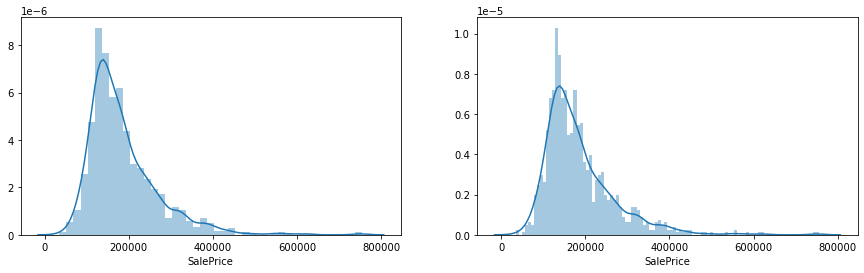

In [6]:
#Searching for any abnormalities with SalePrice distribution using histograms and experimenting with bins.

plt.rcParams['figure.figsize'] = (15,4)
plt.subplot(1,2,1)
sns.distplot(df_train2['SalePrice'])

plt.subplot(1,2,2)
sns.distplot(df_train2['SalePrice'], bins=100)

print("When looking at the histogram we see the data for SalePrice skews to the right. This shows us that the mean is greater than the median SalePrice because of the few homes' prices that push the average higher.")
print()
print("IMPORTANT: Analyzing the second histogram where we used our own bins instead of using the default calculated by Seaborn, we notice highs and lows in the distribution. This may be explained by psychological price points the houses were listed under in order to entice home buyers.")

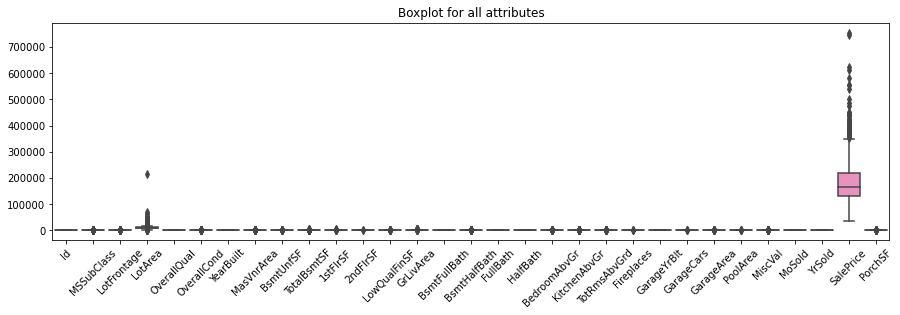

We look at the boxplots for all attributes and visually determine which variables we assume are most likely correlated to SalePrice


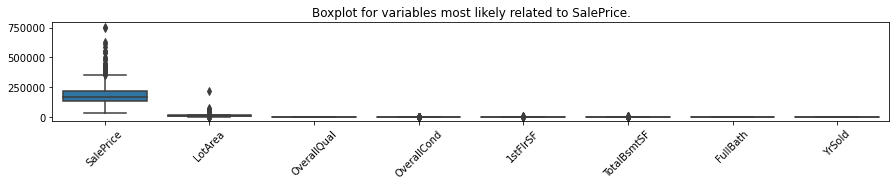

There seems to be a lot of outliers in SalePrice. Let's remove them and see if there are enough remaining data points to continue our analysis without the outliers.


In [7]:
plt.subplot(1,1,1)
plt.rcParams['figure.figsize'] = (15,4)
plt.xticks(rotation='45')
sns.boxplot(data=df_train2)
plt.title("Boxplot for all attributes")
plt.show()

print('We look at the boxplots for all attributes and visually determine which variables we assume are most likely correlated to SalePrice')

BoxPlotFilt = ['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YrSold']
plt.subplot(2,1,2)
plt.rcParams['figure.figsize'] = (15,4)
plt.xticks(rotation='45')
sns.boxplot(data=df_train2[BoxPlotFilt])
plt.title("Boxplot for variables most likely related to SalePrice.")
plt.show()

print("There seems to be a lot of outliers in SalePrice. Let's remove them and see if there are enough remaining data points to continue our analysis without the outliers.")

In [8]:
Q1 = df_train2.quantile(0.25)
Q3 = df_train2.quantile(0.75)

IQR = Q3-Q1

df_No_Outliers = df_train2[~((df_train2 < (Q1 - 1.5 * IQR)) |(df_train2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_No_Outliers.shape[0])

merged_dataframe_proportion = df_No_Outliers.shape[0]/df_train2.shape[0]

print("When we have not removed any outliers from the dataset, we have " + str(df_train2.shape[0]) + " entries.") 

print("When we remove outliers from the dataset, we have " + str(df_No_Outliers.shape[0]) + " entries.")
print("The proportion of entries that are not outliers compared to the dataframe is " + str(round(merged_dataframe_proportion*100,2))+"%")

669
When we have not removed any outliers from the dataset, we have 1121 entries.
When we remove outliers from the dataset, we have 669 entries.
The proportion of entries that are not outliers compared to the dataframe is 59.68%


### Because almost half of the entries are outliers, I will choose to include all entries in my regression model. For now, we will use visualizations to find insights, specifically the variables' correlation to SalePrice. Ultimately, we will use a correlation matrix to find which variables have strong correlation to SalePrice.

# <span style="color:blue"> Insights </span> - <span style="color:black">Let's look for insights now that we've cleaned our data</span> 


### Let's create scatter plots to eyeball correlation.

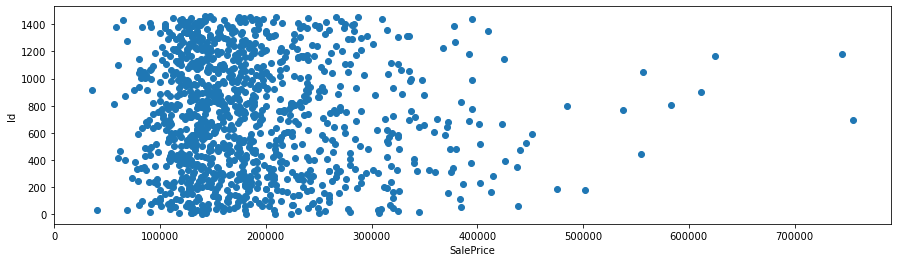

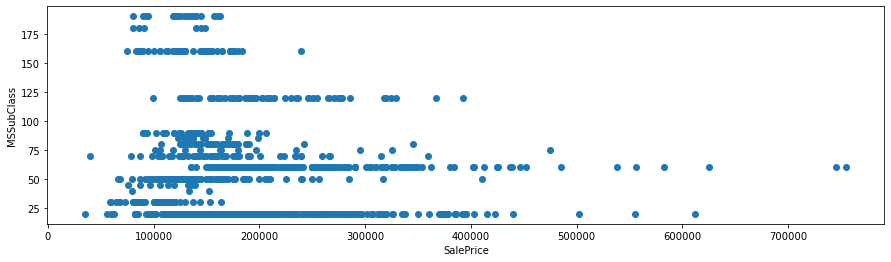

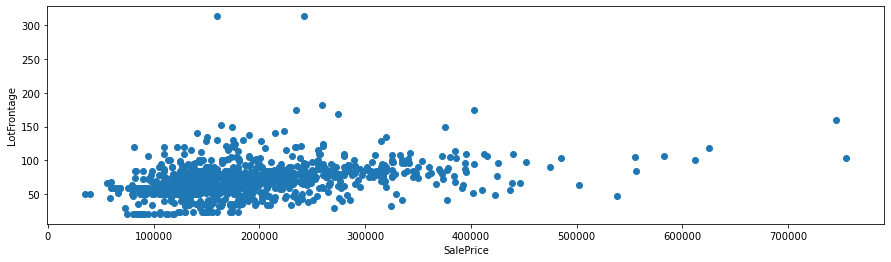

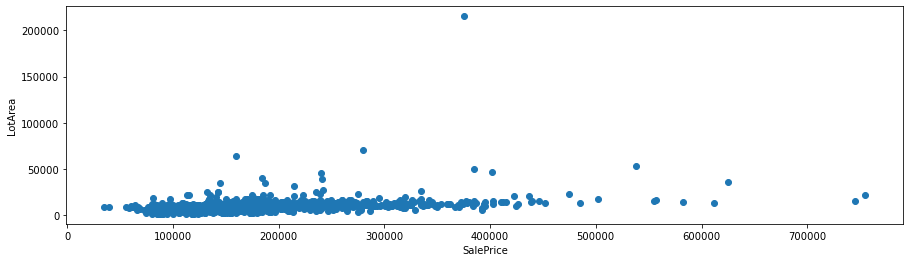

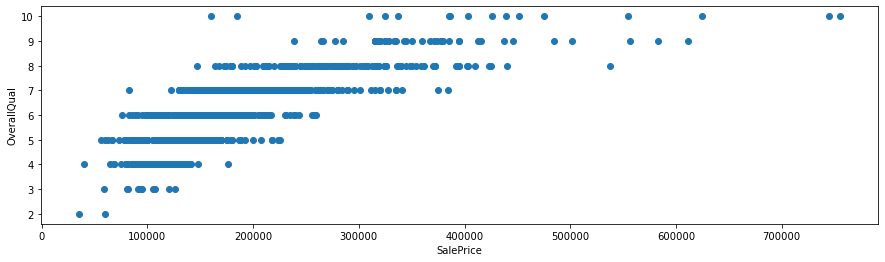

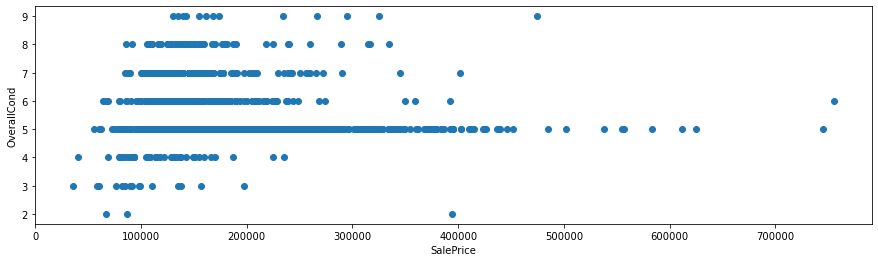

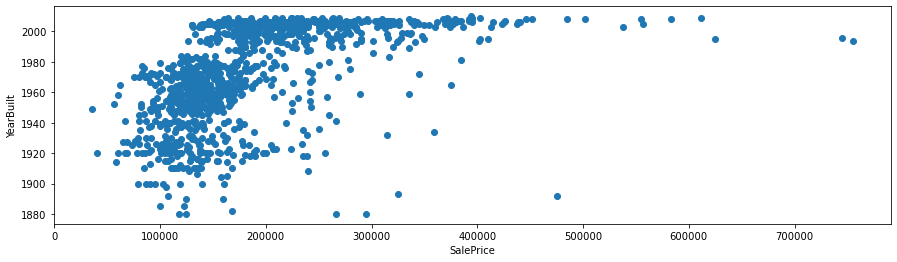

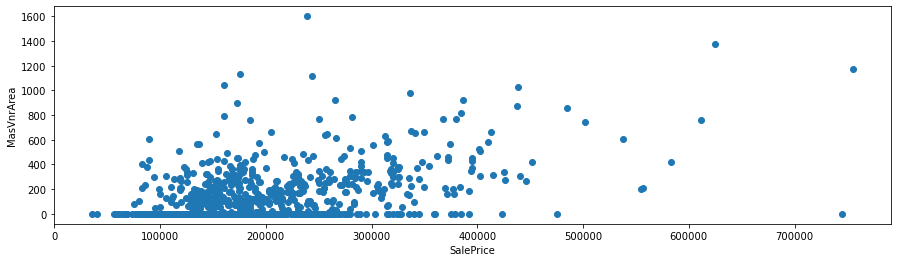

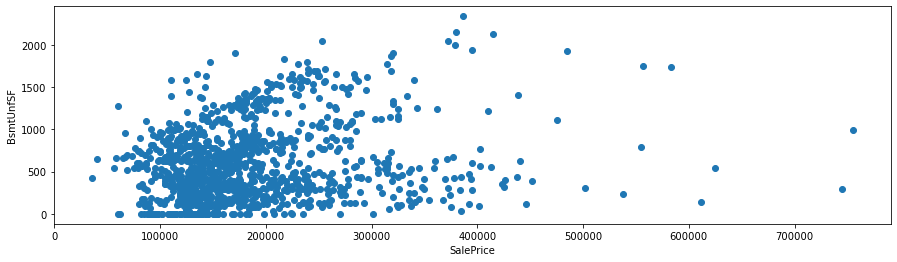

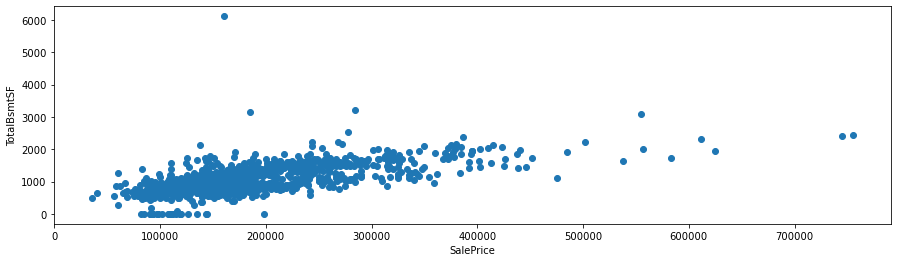

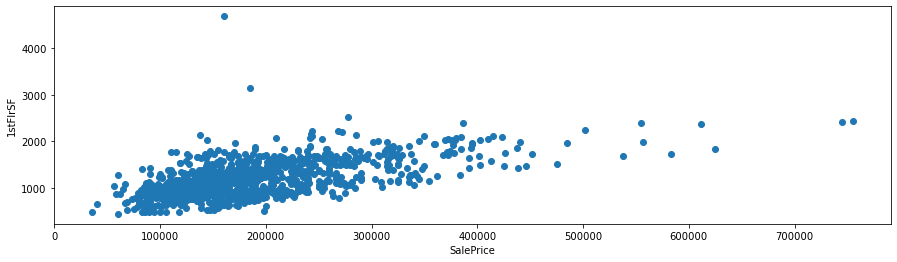

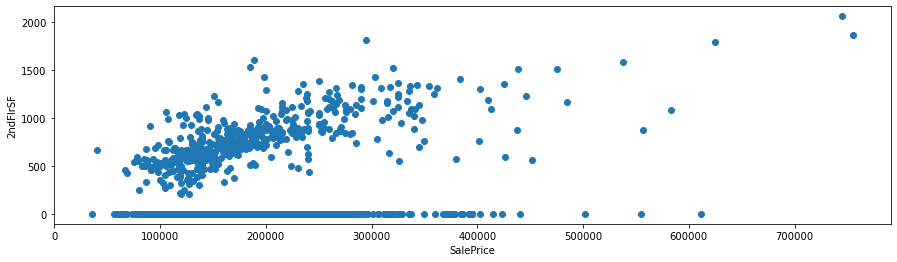

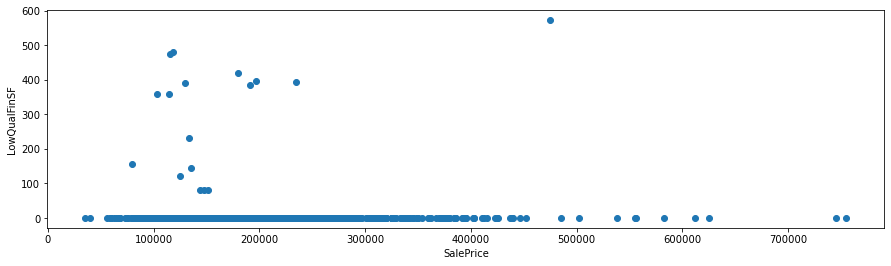

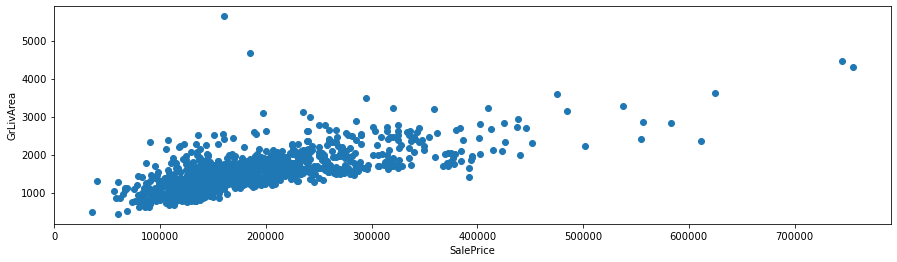

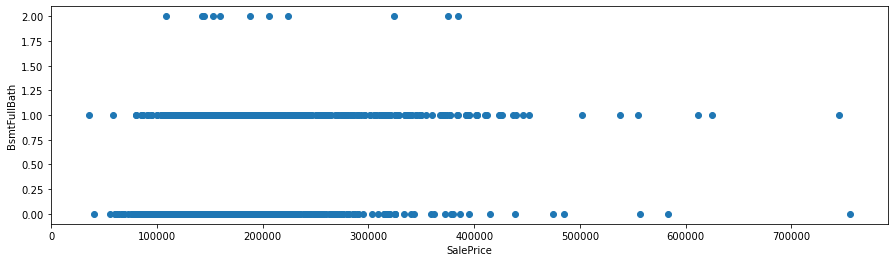

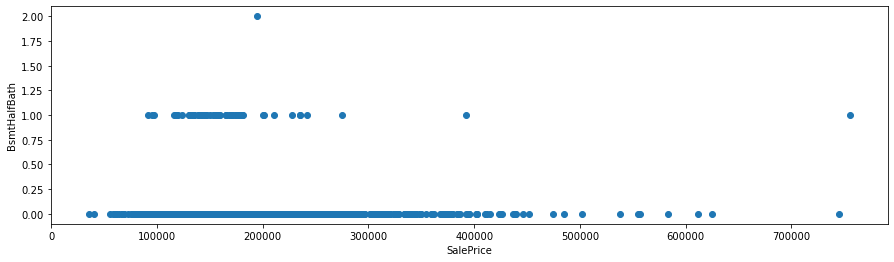

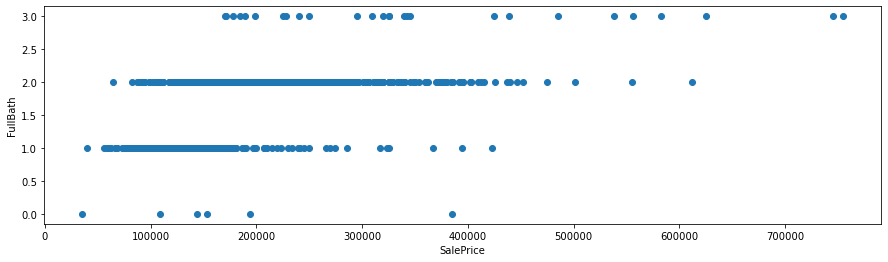

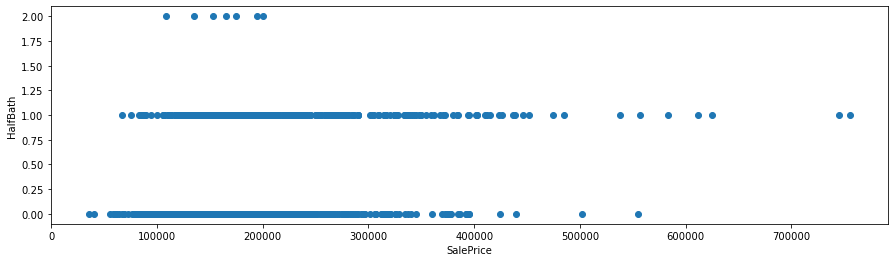

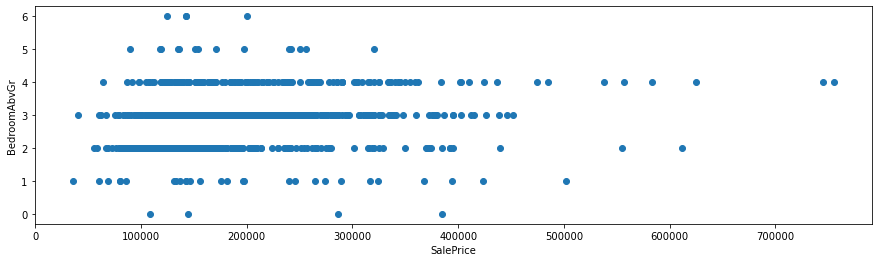

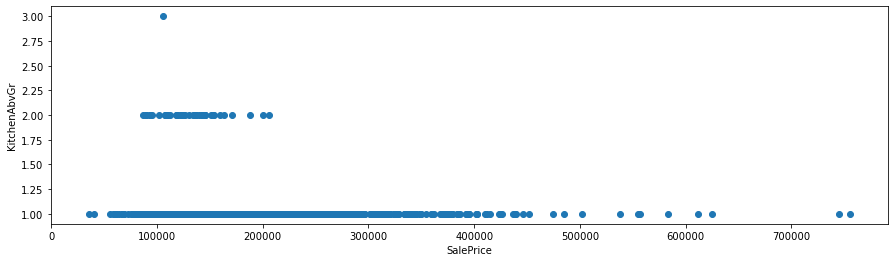

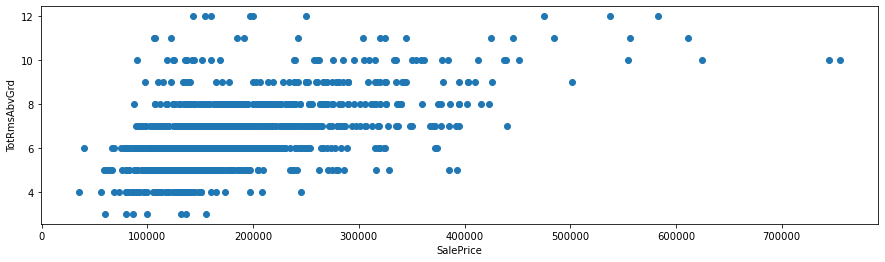

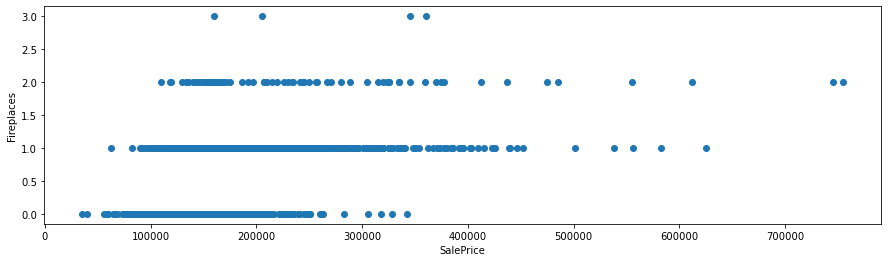

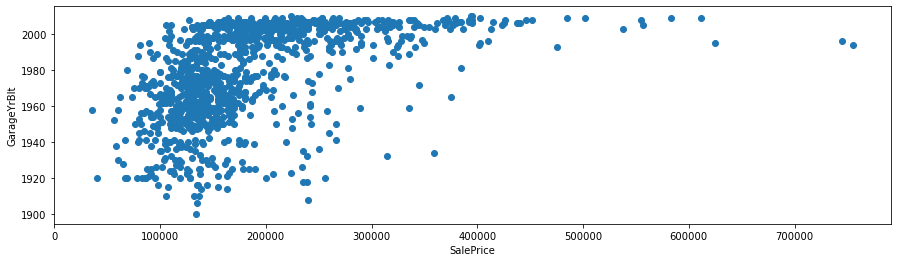

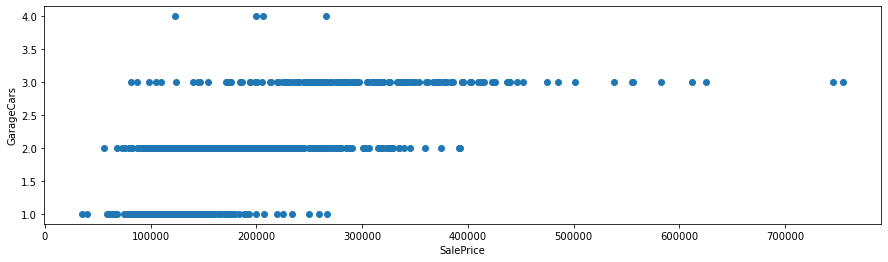

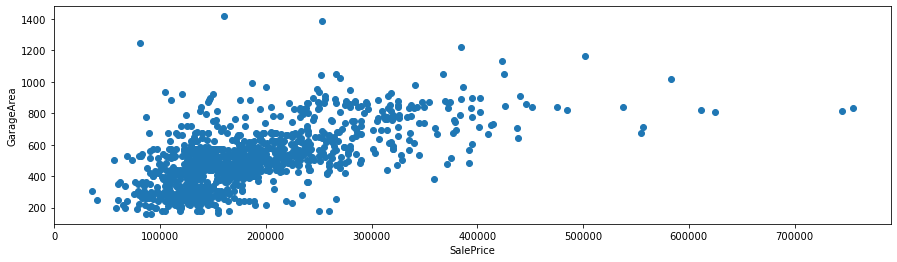

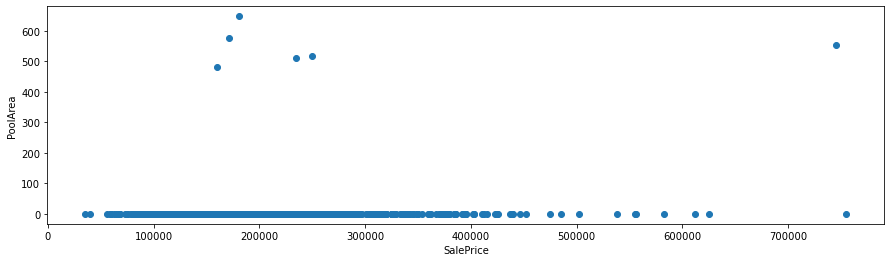

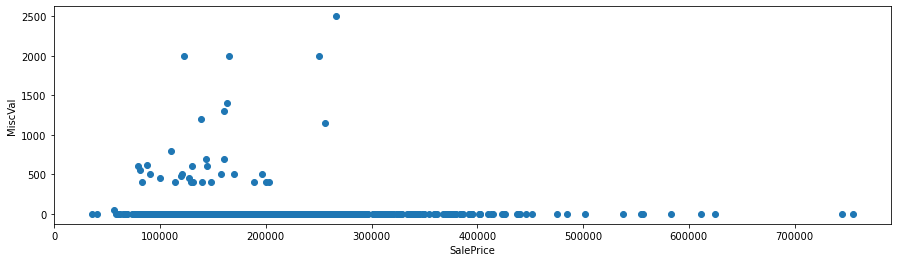

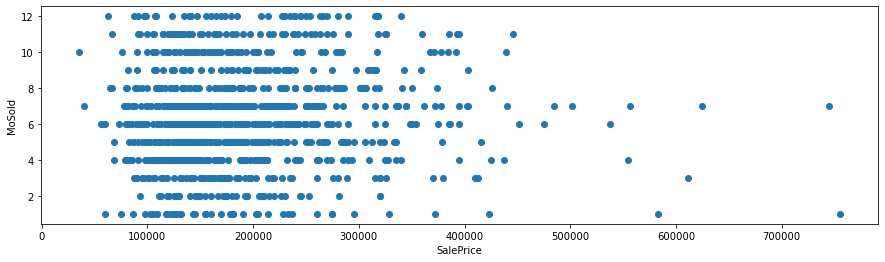

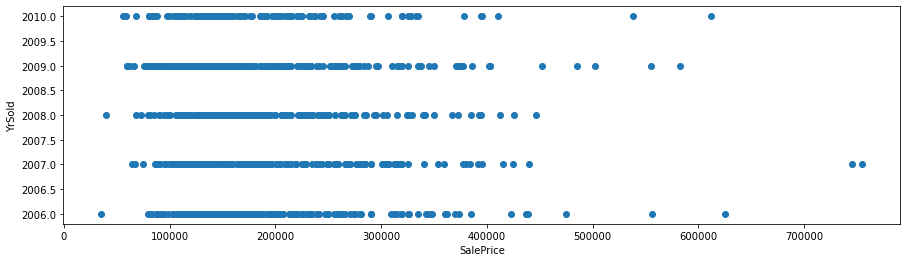

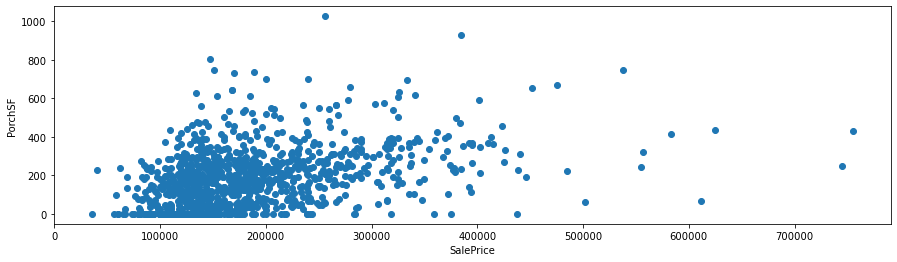

There are some variables that look to be correlated and some that don't. Using a correlation matrix will give us the best visualization to determine the relationships between SalePrice and the other variables.


In [9]:
#creating scatter plots to see if we can see correlation via this type of visual

x_col = df_train2['SalePrice'].reset_index(drop=True)

y_columns = df_train2.drop(columns=['SalePrice']).reset_index(drop=True)

for i in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_train2['SalePrice'], df_train2[i])
    ax.set_xlabel('SalePrice')
    ax.set_ylabel(i)
    plt.show()

print("There are some variables that look to be correlated and some that don't. Using a correlation matrix will give us the best visualization to determine the relationships between SalePrice and the other variables.")


### It's also important to note that this dataset shows SalePrices before, during, and after the Great Recession, when the housing bubble popped. This means house prices were extremely inflated before the crisis and popped right after, leading to divergence in prices when the housing market bubble was being inflated to when it popped.

(30.5, -0.5)

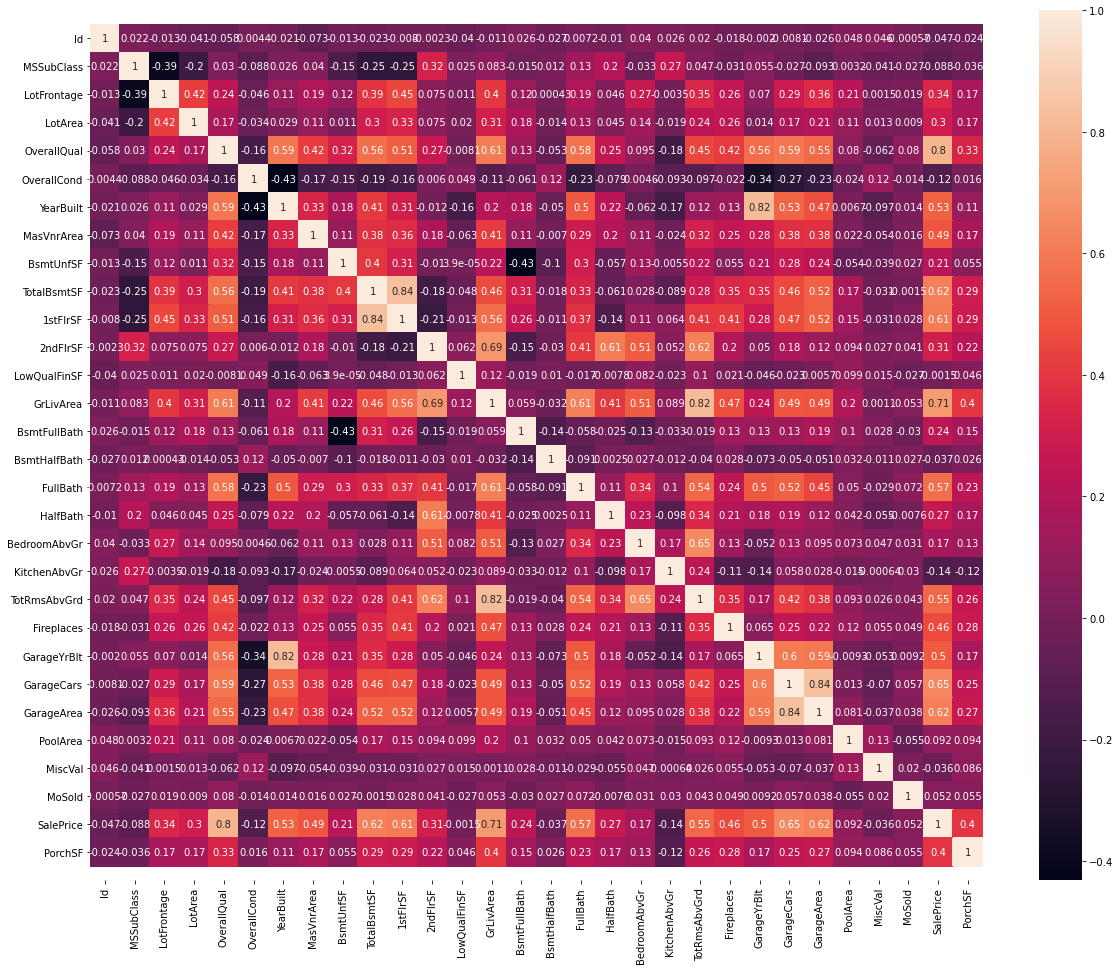

In [10]:
#building correlation matrix heatmap

df_train2 = df_train2.drop(['YrSold'], axis=1)

df_train2 = df_train2.apply (pd.to_numeric, errors='coerce')
df_train2 = df_train2.dropna()
df_train2 = df_train2.reset_index(drop=True)

df_train2_corr = df_train2.corr()

plt.figure(figsize=(20,16))
ax = sns.heatmap(df_train2_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### There is a lot to look at in the correlation matrix. Let's simplify it by looking only at SalePrice and ordering correlation in descending order and creating a nice visual to help us picture the differences.

              SalePrice
OverallQual    0.797881
GrLivArea      0.705154
GarageCars     0.647034
GarageArea     0.619330
TotalBsmtSF    0.615612
1stFlrSF       0.607969
FullBath       0.566627
TotRmsAbvGrd   0.547067
YearBuilt      0.525394
GarageYrBlt    0.504753
MasVnrArea     0.488658
Fireplaces     0.461873
PorchSF        0.396135
LotFrontage    0.344270
2ndFlrSF       0.306879
LotArea        0.299962
HalfBath       0.268560
BsmtFullBath   0.236737
BsmtUnfSF      0.213129
BedroomAbvGr   0.166814
PoolArea       0.092488
MoSold         0.051568
LowQualFinSF  -0.001482
MiscVal       -0.036041
BsmtHalfBath  -0.036513
Id            -0.047122
MSSubClass    -0.088032
OverallCond   -0.124391
KitchenAbvGr  -0.140497


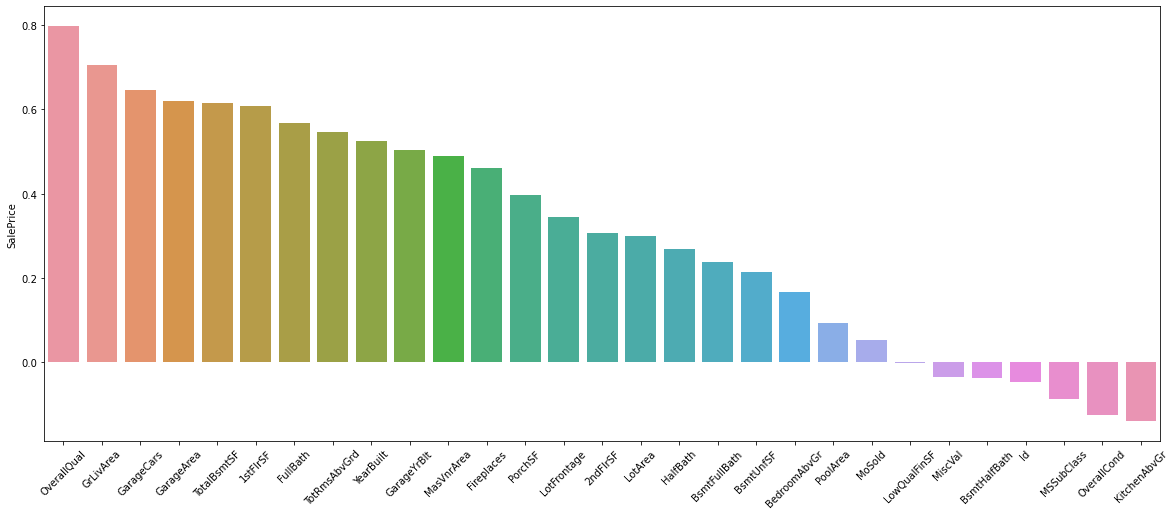

In [11]:
#Order the correlation of each variable to SalePrice in descending order and create a bar chart to display the degree of correlation

row = df_train2_corr.loc[:,['SalePrice']]
row = row.sort_values(by='SalePrice', ascending=False).drop('SalePrice')

plt.figure(figsize=(20,8))
sns.barplot(data=row, x = row.index, y = 'SalePrice')
plt.xticks(rotation='45')

print(row)

### Looks like about 1/3rd of the variables show strong correlation to SalePrice, but I doubt that is truly the case. 
### We'll run regression analysis and see which variables we should keep through this analysis.

In [12]:
X = df_train2.drop(['SalePrice'], axis=1) #We now have only independent variables here without any dependent variables. 
X = sm.add_constant(X) #We've added our constant intercept to our independent variable dataframe

#We've specified SalePrice to the Y Dataframe
#We fit the model below using the statsmodel (denoted by SM) OLS function.
OLSmodel = sm.OLS(df_train2['SalePrice'], X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     164.3
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:23:04   Log-Likelihood:                -13362.
No. Observations:                1121   AIC:                         2.678e+04
Df Residuals:                    1092   BIC:                         2.693e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.238e+05   1.46e+05     -4.968      0.000   -1.01e+06   -4.38e+05
Id              -1.3660      2.652     -0.515      0.607      -6.570       3.838
MSSubClass    -200.9855     34.478     -5.829      0.000    -268.635    -133.335
LotFrontage   -124.1900     60.745     -2.044      0.041    -243.379      -5.001
LotArea          0.5372      0.156      3.438      0.001       0.231       0.844
OverallQual   1.876e+04   1465.843     12.797      0.000    1.59e+04    2.16e+04
OverallCond   6283.2348   1201.110      5.231      0.000    3926.490    8639.980
YearBuilt      358.4442     81.864      4.379      0.000     197.816     519.072
MasVnrArea      32.4614      6.938      4.679      0.000      18.848      46.075
BsmtUnfSF      -10.9878      3.802     -2.890      0.004     -18.447      -3.528
TotalBsmtSF     15.0556      5.695      2.644      0.008       3.882      26.229
1stFlrSF        15.3839      8.452      1.820      0.069      -1.200      31.968
2ndFlrSF        14.4215      7.675      1.879      0.061      -0.638      29.481
LowQualFinSF     2.3988     20.906      0.115      0.909     -38.622      43.420
GrLivArea       32.2042      7.743      4.159      0.000      17.011      47.398
BsmtFullBath  9271.7952   3169.863      2.925      0.004    3052.083    1.55e+04
BsmtHalfBath  2700.0349   5045.203      0.535      0.593   -7199.354    1.26e+04
FullBath      5751.9871   3494.582      1.646      0.100   -1104.868    1.26e+04
HalfBath      -950.1213   3297.364     -0.288      0.773   -7420.007    5519.764
BedroomAbvGr -1.075e+04   2095.896     -5.128      0.000   -1.49e+04   -6635.731
KitchenAbvGr -2.252e+04   6688.440     -3.368      0.001   -3.56e+04   -9400.949
TotRmsAbvGrd  5537.1792   1483.207      3.733      0.000    2626.921    8447.437
Fireplaces    4631.3105   2167.264      2.137      0.033     378.838    8883.783
GarageYrBlt    -27.4150     88.402     -0.310      0.757    -200.871     146.041
GarageCars    1.779e+04   3459.435      5.144      0.000     1.1e+04    2.46e+04
GarageArea       3.5562     12.007      0.296      0.767     -20.003      27.116
PoolArea       -56.6338     29.682     -1.908      0.057    -114.874       1.606
MiscVal         -2.2831      6.882     -0.332      0.740     -15.787      11.221
MoSold        -201.4182    415.589     -0.485      0.628   -1016.861     614.024
PorchSF         20.6625      8.182      2.526      0.012       4.609      36.716
==============================================================================
Omnibus:                      434.945   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63859.822
Skew:                          -0.681   Prob(JB):                         0.00
Kurtosis:                      39.951   Cond. No.                     1.24e+16
===============

### Based off of the OLS Regression Results, we can easily see the variables that stand out and most affect SalePrice because their coefficients are much greater in absolute terms.

### The variables that affect SalesPrice the most are OverallQual, OverallCond, YearBuilt, MasVnrArea, BsmtUnfSF, GrLivArea, BsmtFullBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, and GarageCars. For some reason BedroomAbvGr and KitchenAbvGr affects price negatively, but I doubt that is the case in reality. They are probably only negative to help us calculate the SalePrice of a home when we have all the variables accounted for. 

### On that note, it's important to realize that just because a variable has a high coefficient, it may not have an acceptable p-value. It is important that we only pick variables with acceptable p-values. 

### Since, we have a lot of variables we are prone to overfitting if we use all of these variables in our regression model, let's remove those with an unacceptable p-value.

In [13]:
#create a filter that only has variables with a correlation greater than .50 to SalePrice

filt1 = ['OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'GrLivArea',
         'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice'] 

X = df_train2[filt1].drop(['SalePrice'], axis=1) #We now have only independent variables here without any dependent variables. 
X = sm.add_constant(X) #We've added our constant intercept to our independent variable dataframe

#We've specified SalePrice to the Y Dataframe
#We fit the model below using the statsmodel (denoted by SM) OLS function.
OLSmodel = sm.OLS(df_train2['SalePrice'], X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     370.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:23:04   Log-Likelihood:                -13422.
No. Observations:                1121   AIC:                         2.687e+04
Df Residuals:                    1109   BIC:                         2.693e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.575e+05   1.11e+05     -6.823      0.000   -9.75e+05    -5.4e+05
OverallQual   1.947e+04   1478.519     13.166      0.000    1.66e+04    2.24e+04
OverallCond   7025.6428   1237.907      5.675      0.000    4596.739    9454.546
YearBuilt      345.9699     56.213      6.155      0.000     235.675     456.265
MasVnrArea      36.1030      7.025      5.139      0.000      22.319      49.887
BsmtUnfSF        1.2975      3.202      0.405      0.685      -4.984       7.579
GrLivArea       53.8075      4.595     11.709      0.000      44.791      62.824
BsmtFullBath  1.862e+04   2692.943      6.914      0.000    1.33e+04    2.39e+04
BedroomAbvGr -1.082e+04   2095.850     -5.161      0.000   -1.49e+04   -6705.444
KitchenAbvGr -3.774e+04   6231.087     -6.057      0.000      -5e+04   -2.55e+04
TotRmsAbvGrd  5489.2299   1515.868      3.621      0.000    2514.937    8463.523
GarageCars    2.135e+04   2477.725      8.616      0.000    1.65e+04    2.62e+04
==============================================================================
Omnibus:                      323.537   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28745.429
Skew:                          -0.204   Prob(JB):                         0.00
Kurtosis:                      27.804   Cond. No.                     2.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We've kept all variables with acceptable p-values, but we are finding that BedroomAbvGr and KitchenAbvGr are still negatively correlated to SalePrice and now we see that MsntUnfSF has an unacceptable p-value. Let's remove these variables and see happens to our R-squared value. 

In [14]:
filt2 = ['OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'GrLivArea',
         'BsmtFullBath', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice'] 

X = df_train2[filt2].drop(['SalePrice'], axis=1) #We now have only independent variables here without any dependent variables. 
X = sm.add_constant(X) #We've added our constant intercept to our independent variable dataframe

#We've specified SalePrice to the Y Dataframe
#We fit the model below using the statsmodel (denoted by SM) OLS function.
OLSmodel = sm.OLS(df_train2['SalePrice'], X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     477.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:23:04   Log-Likelihood:                -13452.
No. Observations:                1121   AIC:                         2.692e+04
Df Residuals:                    1112   BIC:                         2.697e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.589e+05   1.12e+05     -7.685      0.000   -1.08e+06    -6.4e+05
OverallQual   2.312e+04   1399.287     16.521      0.000    2.04e+04    2.59e+04
OverallCond   7654.1027   1247.648      6.135      0.000    5206.093    1.01e+04
YearBuilt      368.9294     57.070      6.464      0.000     256.952     480.907
MasVnrArea      37.4648      7.195      5.207      0.000      23.348      51.582
GrLivArea       53.0236      4.665     11.367      0.000      43.871      62.176
BsmtFullBath  1.917e+04   2365.038      8.104      0.000    1.45e+04    2.38e+04
TotRmsAbvGrd   -76.9662   1336.213     -0.058      0.954   -2698.749    2544.817
GarageCars    2.016e+04   2478.464      8.133      0.000    1.53e+04     2.5e+04
==============================================================================
Omnibus:                      300.686   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20111.479
Skew:                           0.181   Prob(JB):                         0.00
Kurtosis:                      23.747   Cond. No.                     2.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now we see that TotRmsAbvGrd has a negative coefficient and a very high p-value. We must take it out to make our equation even better.

In [15]:
filt2 = ['OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'GrLivArea',
         'BsmtFullBath', 'GarageCars', 'SalePrice'] 

X = df_train2[filt2].drop(['SalePrice'], axis=1) #We now have only independent variables here without any dependent variables. 
X = sm.add_constant(X) #We've added our constant intercept to our independent variable dataframe

#We've specified SalePrice to the Y Dataframe
#We fit the model below using the statsmodel (denoted by SM) OLS function.
OLSmodel = sm.OLS(df_train2['SalePrice'], X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     546.7
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:23:04   Log-Likelihood:                -13452.
No. Observations:                1121   AIC:                         2.692e+04
Df Residuals:                    1113   BIC:                         2.696e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.594e+05   1.11e+05     -7.723      0.000   -1.08e+06   -6.41e+05
OverallQual   2.312e+04   1393.830     16.591      0.000    2.04e+04    2.59e+04
OverallCond   7655.9872   1246.660      6.141      0.000    5209.918    1.01e+04
YearBuilt      369.0948     56.973      6.478      0.000     257.309     480.881
MasVnrArea      37.4750      7.189      5.212      0.000      23.369      51.581
GrLivArea       52.8257      3.153     16.753      0.000      46.639      59.013
BsmtFullBath  1.918e+04   2349.930      8.163      0.000    1.46e+04    2.38e+04
GarageCars    2.014e+04   2462.929      8.179      0.000    1.53e+04     2.5e+04
==============================================================================
Omnibus:                      300.745   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20042.662
Skew:                           0.185   Prob(JB):                         0.00
Kurtosis:                      23.711   Cond. No.                     2.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

0       237169.257576
1       176853.863110
2       239171.673906
3       217856.691946
4       310879.995139
            ...      
1116    182712.981466
1117    228763.194088
1118    231519.414777
1119    118139.504720
1120    133078.903468
Length: 1121, dtype: float64


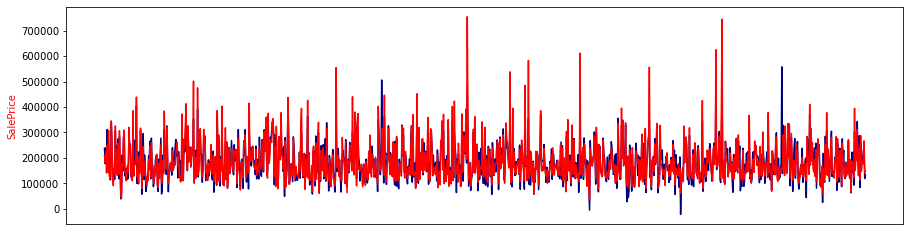

In [16]:

plt.rcParams['figure.figsize'] = (15,4)


RegressionResults=OLSmodelResult.predict(X)
print(RegressionResults)

fig, ax1 = plt.subplots()

ax1.get_xaxis().set_visible(False)
ax1.set_ylabel('Regression Result', color='navy')
ax1.plot(RegressionResults, color='navy') 
ax1.set_ylabel('SalePrice', color='red')
ax1.plot(df_train2['SalePrice'], color='red')

### We can find homes values based off of the regression model we made and compare their market price to our model's price in order to look for a good deal or undervalued home. It will be accurate 77.5% of the time.

### We also see that the overall condition of the home is the biggest factor in price. If a home has room to be fixed and improved so that overall condition is rated higher, then the home has great potential to be sold for more than it was bought. 

### The best thing about this model is that it takes it only takes into account variables with p-values less than .001 meaning that less than .1% of our results will happen by chance.

# <span style="color:blue"> Key Takeways </span>

In [17]:
#reload data so we can have a clean start again with the same raw data
#adding new variables from our EDA into the table 

train = pd.read_csv("../input/train2csv/train2.csv", header=0)

df_train2.loc[:,'RegressionResults'] = RegressionResults
df_train2 = pd.merge(df_train2,train,on='Id')

df_train2["RegressionResults"].astype(int)
df_train2["SalePrice_x"].astype(int)

Variance = df_train2["RegressionResults"] - df_train2["SalePrice_x"]
df_train2.loc[:,'Variance'] = Variance
df_train2["Variance"].astype(int)

Variance_PCT = Variance/df_train2["SalePrice_x"]
df_train2.loc[:,'Variance_PCT'] = Variance_PCT
df_train2['Variance_PCT'].astype(int)

df_train2.head()
filt = ['Id','Neighborhood','RegressionResults', 'SalePrice_x', 'Variance', 'Variance_PCT']
df_train3 = df_train2[filt]

df = df_train3[df_train3['Variance_PCT'] > .10] 

df_NBHD = df.groupby(['Neighborhood']).sum().reset_index()
df_NBHD

,Neighborhood,Id,RegressionResults,SalePrice_x,Variance,Variance_PCT
0,Blmngtn,6970,1.858986e+06,1576936,2.820503e+05,1.620568
1,Blueste,1557,3.590060e+05,275000,8.400599e+04,0.610082
2,BrDale,10061,1.979070e+06,1468400,5.106705e+05,5.053050
3,BrkSide,6806,1.423367e+06,1183900,2.394667e+05,1.799211
4,ClearCr,1688,5.873146e+05,490000,9.731462e+04,0.602277
5,CollgCr,23097,6.409881e+06,5577325,8.325562e+05,4.428722
6,Crawfor,3567,1.093792e+06,856000,2.377919e+05,1.528907
7,Edwards,19210,4.678147e+06,3103150,1.574997e+06,11.223270
8,Gilbert,13306,3.344870e+06,2849137,4.957325e+05,2.804447
9,IDOTRR,2002,6.145734e+05,490493,1.240804e+05,2.011367


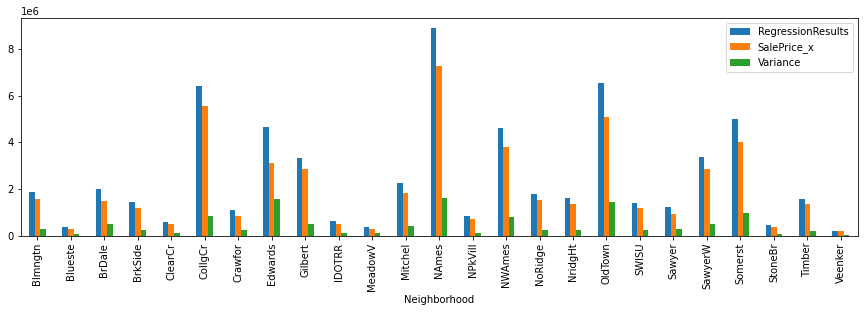

In [18]:
df_NBHD.plot(x='Neighborhood', y=['RegressionResults', 'SalePrice_x', 'Variance'], kind='bar')

### By creating a Regression Model, we are able to find homes that are undervalued by 10% and fit our investing criteria. These homes create great opportunities for us to use our capital to make profits and then for our profits to make more profits.

#### Key Insights:

#### 1.The recommended strategy is to invest in neighborhoods with the highest variance percentage first because they will return a greater ROI. 
#### 2. We can then use the profits from the first investment and roll it over on to the next investment. In doing so, we will be able to minimize invested capital and use our profits to make more profits.
#### 3. From the visualization we can see that the Edwards neighborhood has the greatest variance percentage so we should invest in that neighborhood first.